# ⚔️ Scenario 2: Competition Aware Pricing
### *Surviving the Price War*

**The Concept:** Even with High Demand, you cannot ignore the market.
* If the Competitor is **Cheaper**, your Demand curve becomes fragile.
* If the Competitor is **More Expensive**, you gain "Premium Space" to increase margins.

**The 3 Inputs:**
1.  **Demand Strength:** Customer desire ($0 - 100$).
2.  **Inventory Level:** Stock pressure ($0 - 1000$).
3.  **Competitor Gap:** The % difference between us and them ($-50\%$ to $+50\%$).
    * *Negative:* They are cheaper (Threat).
    * *Positive:* They are expensive (Opportunity).

**The Output:**
* **Price Adjustment:** Dynamic reaction ($-25\%$ to $+25\%$).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 37.2 MB/s eta 0:00:00


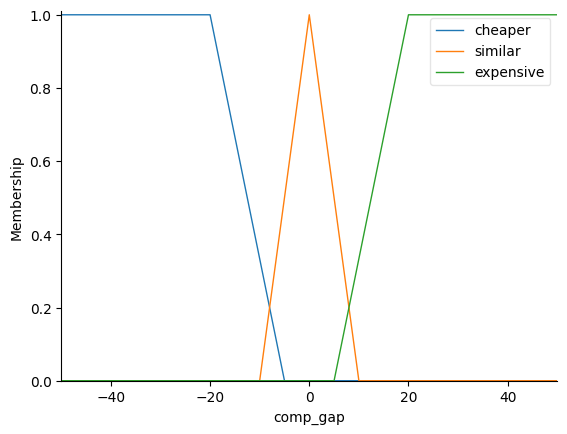

In [1]:
!pip install scikit-fuzzy -q
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Define Universes
demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
inventory = ctrl.Antecedent(np.arange(0, 1001, 1), 'inventory')
comp_gap = ctrl.Antecedent(np.arange(-50, 51, 1), 'comp_gap') # Rakip farkı
price_chg = ctrl.Consequent(np.arange(-25, 26, 1), 'price_chg')

# 2. Membership Functions
# Demand & Inventory (Same as before)
demand['low'] = fuzz.trapmf(demand.universe, [0, 0, 30, 50])
demand['medium'] = fuzz.trimf(demand.universe, [40, 60, 80])
demand['high'] = fuzz.trapmf(demand.universe, [70, 90, 100, 100])

inventory['scarce'] = fuzz.trapmf(inventory.universe, [0, 0, 100, 300])
inventory['healthy'] = fuzz.trimf(inventory.universe, [200, 500, 800])
inventory['overstock'] = fuzz.trapmf(inventory.universe, [700, 900, 1000, 1000])

# Competitor Gap (The New Variable)
# "Cheaper": Rakip bizden %10 ile %50 arası daha ucuz
comp_gap['cheaper'] = fuzz.trapmf(comp_gap.universe, [-50, -50, -20, -5])
# "Similar": Fiyatlar kafa kafaya
comp_gap['similar'] = fuzz.trimf(comp_gap.universe, [-10, 0, 10])
# "Expensive": Rakip bizden pahalı (Biz avantajlıyız)
comp_gap['expensive'] = fuzz.trapmf(comp_gap.universe, [5, 20, 50, 50])

# Output: Price Action
price_chg['slash'] = fuzz.trapmf(price_chg.universe, [-25, -25, -15, -10]) # Derin indirim
price_chg['discount'] = fuzz.trimf(price_chg.universe, [-12, -6, 0])
price_chg['hold'] = fuzz.trimf(price_chg.universe, [-2, 0, 2])
price_chg['hike'] = fuzz.trimf(price_chg.universe, [0, 6, 12])
price_chg['premium'] = fuzz.trapmf(price_chg.universe, [10, 15, 25, 25]) # Lüks fiyatlama

# Görselleştirelim: Rakibin konumu nasıl algılanıyor?
comp_gap.view()

### 🧠 The Rules of Engagement
Here, we define how to react to market pressure. This is where **Strategy** meets **Math**.

**Strategic Logic:**
1.  **Defense:** If Demand is Low AND Competitor is Cheaper $\rightarrow$ We must **Slash** prices to survive.
2.  **Opportunity:** If Demand is High AND Competitor is Expensive $\rightarrow$ We are the "Smart Choice," so we can add a **Premium**.
3.  **Inventory Pressure:** Even if Competitor is Cheap, if we have Scarce Stock, we don't need to drop prices (Scarcity protects us).

| Demand | Inventory | Competitor | Action | Logic |
| :--- | :--- | :--- | :--- | :--- |
| High | Scarce | Expensive | **Premium** | Market Leader |
| Low | Overstock | Cheaper | **Slash** | Liquidation War |
| Medium | Healthy | Similar | **Hold** | Stability |
| High | Healthy | Cheaper | **Hold** | Brand Power protects us |
| Low | Healthy | Expensive | **Hold** | We are the budget option |

Strategic Price Adjustment: -6.00%


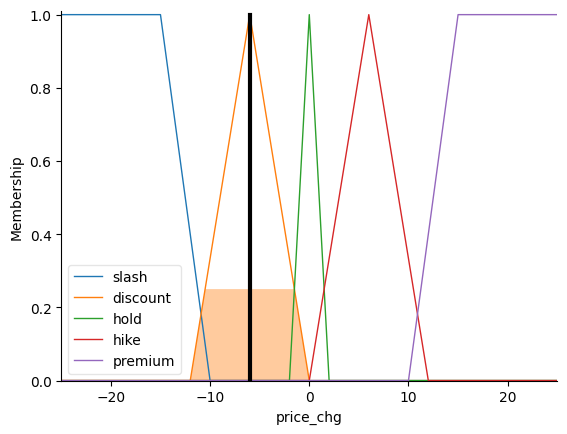

In [2]:
# 3. Strategic Rules
# A. Aggressive Growth (Profit Maximization)
r1 = ctrl.Rule(demand['high'] & comp_gap['expensive'], price_chg['premium'])
r2 = ctrl.Rule(demand['high'] & inventory['scarce'], price_chg['hike']) # Scarcity trumps competition

# B. Defensive Maneuvers (Survival)
r3 = ctrl.Rule(demand['low'] & comp_gap['cheaper'], price_chg['slash'])
r4 = ctrl.Rule(inventory['overstock'] & comp_gap['cheaper'], price_chg['slash'])

# C. Stabilization (Market Equilibrium)
r5 = ctrl.Rule(demand['medium'] & inventory['healthy'] & comp_gap['similar'], price_chg['hold'])
r6 = ctrl.Rule(demand['high'] & comp_gap['cheaper'], price_chg['discount']) # Slight drop to compete
r7 = ctrl.Rule(demand['low'] & comp_gap['expensive'], price_chg['hold']) # Don't drop, we are already cheaper

# Build System
comp_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7])
comp_engine = ctrl.ControlSystemSimulation(comp_ctrl)

# Test Scenario: "The Squeeze"
# Demand is Good (75), but Competitor is 15% Cheaper (-15)
comp_engine.input['demand'] = 75
comp_engine.input['inventory'] = 500 # Healthy
comp_engine.input['comp_gap'] = -15

comp_engine.compute()
print(f"Strategic Price Adjustment: {comp_engine.output['price_chg']:.2f}%")
price_chg.view(sim=comp_engine)

### 📊 Visualizing Competition
Since we have 3 inputs, we use **Slicing**.
We fix **Inventory** at a "Healthy" level (500 units) to isolate the battle between **Demand** and **Competitor Pressure**.

* **X-Axis:** Customer Demand
* **Y-Axis:** Competitor Price Gap (Negative = They are cheaper)
* **Z-Axis:** Our Price Move

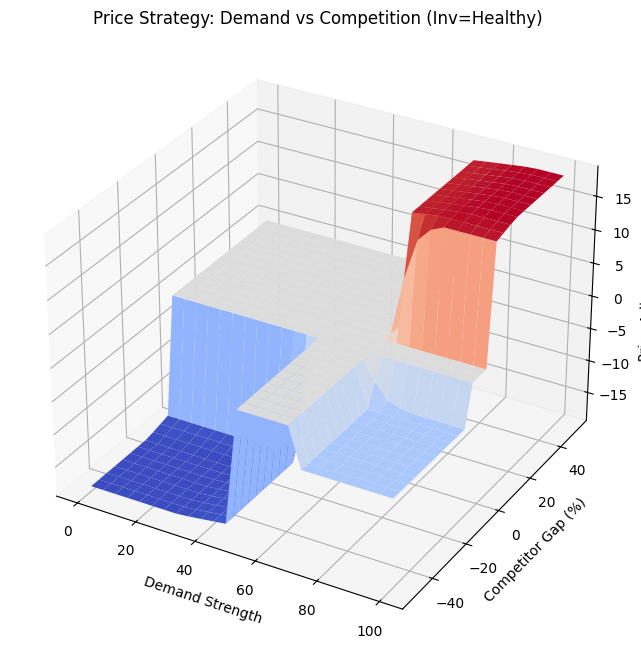

In [3]:
import matplotlib.pyplot as plt

# Grid Setup
x_dem = np.linspace(0, 100, 25)
y_gap = np.linspace(-50, 50, 25) # Competitor diff from -50% to +50%
x, y = np.meshgrid(x_dem, y_gap)
z = np.zeros_like(x)

# Loop with Fixed Inventory
for i in range(25):
    for j in range(25):
        comp_engine.input['demand'] = x[i, j]
        comp_engine.input['comp_gap'] = y[i, j]
        comp_engine.input['inventory'] = 500 # Slicing at Healthy Stock
        try:
            comp_engine.compute()
            z[i, j] = comp_engine.output['price_chg']
        except:
            z[i, j] = 0

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='none')

ax.set_title('Price Strategy: Demand vs Competition (Inv=Healthy)')
ax.set_xlabel('Demand Strength')
ax.set_ylabel('Competitor Gap (%)')
ax.set_zlabel('Price Adjustment (%)')
plt.show()

### 🕹️ Bonus: Interactive Strategy Simulation
Rotate the map to find the **"Kill Zone"**.
* Look at the corner where **Demand is Low** and **Competitor is Cheaper** (Deep Blue). That's where you must slash prices to survive.
* Look at the opposite corner (Deep Red). That's pure profit.

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(
    z=z, x=x, y=y,
    colorscale='IceFire', # Cool (Slash) to Hot (Premium)
    opacity=0.9
)])

fig.update_layout(
    title='Interactive Pricing War Room (Healthy Stock)',
    scene=dict(
        xaxis_title='Demand',
        yaxis_title='Competitor Gap (%)',
        zaxis_title='Our Price Action (%)'
    ),
    width=800, height=700
)

fig.show()